# 🌸 Análise preditiva para prever o diagnóstico de câncer de mama 🌸

De Ihan Messias

1. Identificando o Problema:

    O câncer de mama é a forma mais comum de câncer em mulheres nos Estados Unidos, representando quase um terço de todos os diagnósticos. Além disso, é a segunda principal causa de morte relacionada ao câncer entre as mulheres. Essa condição surge devido ao crescimento anormal de células no tecido mamário, formando tumores que podem variar de benignos a malignos. O diagnóstico é realizado por meio de diversos exames, como mamografia, ressonância magnética, ultrassom e biópsia.

2. Objetivo:
    O problema se enquadra em duas categorias:
    - 1 = Maligno (canceroso) — Detectado
    - 0 = Benigno (não canceroso) — Ausente
    
    `No contexto do aprendizado de máquina, isso representa um problema de classificação.`

    > Nosso objetivo é criar um modelo inteligente capaz de determinar se um caso de câncer de mama é benigno ou maligno, ou seja, se é inofensivo ou potencialmente perigoso, ao receber novos dados. Utilizaremos um método chamado classificação, que é essencialmente baseado em fórmulas matemáticas. Essas fórmulas aprendem com dados anteriores e, quando fornecemos novos dados, conseguem fazer previsões precisas sobre a natureza do câncer: benigno ou maligno.

    > Nosso modelo representa uma ferramenta inestimável para médicos e profissionais de saúde, oferecendo insights confiáveis e fundamentados em dados. Desempenha um papel crucial na identificação precisa do câncer de mama, permitindo diagnósticos mais rápidos e precisos. Essa precisão é essencial para um tratamento eficaz, proporcionando aos pacientes uma melhor chance de recuperação.

3. Localização dos Dados:

    > A fonte dos dados que utilizamos está disponível em um repositório de aprendizado de máquina mantido pela Universidade da Califórnia, Irvine. Este conjunto de dados é composto por 569 amostras de células tumorais.

    *<a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data" target="_blank">Clique aqui</a> para baixar os dados pelo kaggle*

## Análise exploratória de dados

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # v3.4
import seaborn as sns

In [2]:
# inserting dataframe
df = pd.read_csv('./data.csv')

In [3]:
# capture dimention
l,c = df.shape
print(f'linhas: {l} | colunas: {c}')

linhas: 569 | colunas: 33


In [4]:
# checking missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# remove columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# check diagnostic values
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Text(0.5, 1.0, 'Contagem de M e B')

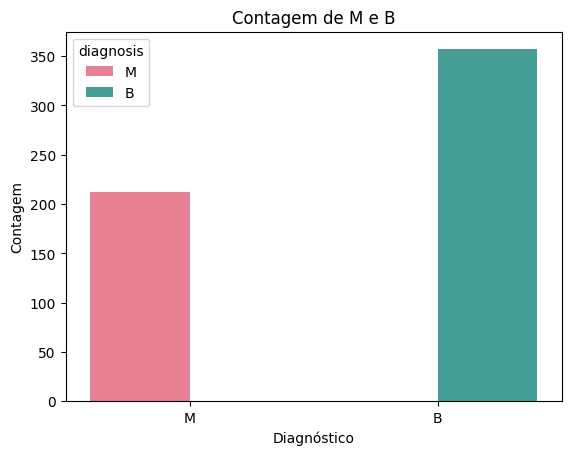

In [8]:
# diagnostic values
ax = sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='husl' )
ax.set(xlabel='Diagnóstico', ylabel='Contagem')
plt.title('Contagem de M e B')

Classificação binária é mais simples de entender e implementar em comparação com problemas de classificação multiclasse.

In [9]:
# binary classification
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

<Axes: >

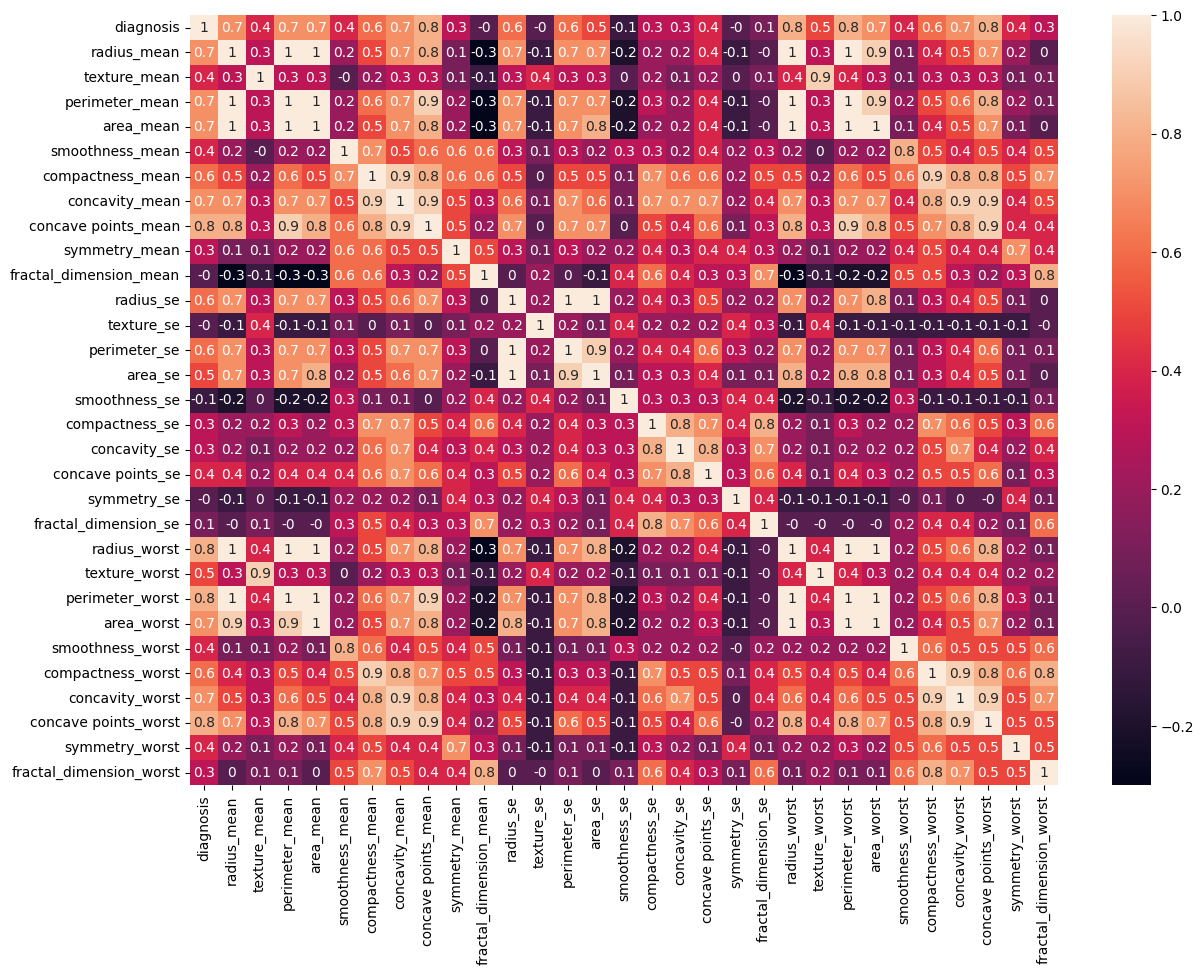

In [10]:
# correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr().round(1), annot=True)

## Pré-processamento dos dados

- sklearn.model_selection.train_test_split:
> Usada para dividir um conjunto de dados em conjuntos de treinamento e teste para treinar e avaliar modelos de machine learning.

- sklearn.ensemble.RandomForestClassifier:
> Algoritmo de aprendizado de máquina baseado em árvores de decisão. O modelo de RandomForest cria várias árvores de decisão e as combina para obter previsões mais precisas ( Usa a média das previsões das árvores individuais para fazer previsões finais).

- sklearn.metrics.classification_report:
> Relatório de métricas de classificação, incluindo precisão, recall e F1-score para avaliar o desempenho de um modelo de classificação.

- sklearn.metrics.confusion_matrix:
> Matriz de confusão que mostra as contagens de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

In [11]:
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Model 1
from sklearn.linear_model import LogisticRegression # Model 2
from sklearn.svm import SVC # Model 3
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# dataset split
X = df.drop(columns=['diagnosis']) # dataset independent variables (M,B)
y = df['diagnosis']  # Target data (what we want to predict)
# training and testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

A escolha do número 42 como valor para random_state ou qualquer outro número inteiro não tem um significado especial do ponto de vista da funcionalidade do algoritmo RandomForestClassifier. O importante é que ele seja fixo para garantir que os resultados do modelo sejam reproduzíveis em diferentes execuções do código. Em programação e na comunidade de desenvolvedores, o número 42 é algumas vezes usado como uma “Resposta para a Vida, o Universo e Tudo” em uma piada popular do livro “O Guia do Mochileiro das Galáxias” de Douglas Adams. No contexto da pergunta “qual é a resposta para a vida, o universo e tudo mais?”, a resposta foi calculada por um supercomputador como sendo o número 42, embora o significado exato disso seja um mistério, conforme a narrativa do livro.

## Construção dos Modelos

In [13]:
tree_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression(max_iter=3000)
svm_clf = SVC()
rf_clf = RandomForestClassifier(random_state=42)

voting_clfs = VotingClassifier(estimators=[('tree', tree_clf), ('lr', lr_clf), ('svm', svm_clf), ('rf', rf_clf)], voting='hard')
voting_clfs.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('lr', LogisticRegression(max_iter=3000)),
                             ('svm', SVC()),
                             ('rf', RandomForestClassifier(random_state=42))])

## Avaliação dos Modelos

Acurácia:
Ela representa a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. Em outras palavras, a acurácia mede a precisão global do modelo.

A fórmula para calcular a acurácia é:

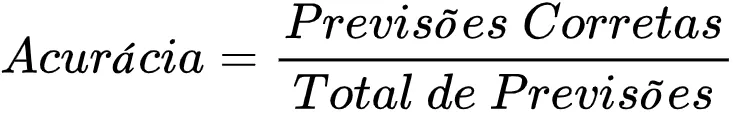

Classificação:

- Precision (Precisão): É a porcentagem de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Quanto mais alta, menos falsos positivos o modelo tem.
- Recall (Sensibilidade): É a porcentagem de instâncias positivas reais que o modelo conseguiu capturar corretamente. Quanto mais alta, menos falsos negativos o modelo tem.
- F1-Score: É uma média equilibrada entre precisão e recall. É útil quando você quer uma métrica única que leve em consideração tanto falsos positivos quanto falsos negativos.

DecisionTreeClassifier
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       108
           1       0.86      0.95      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171

LogisticRegression
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

SVC
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94  

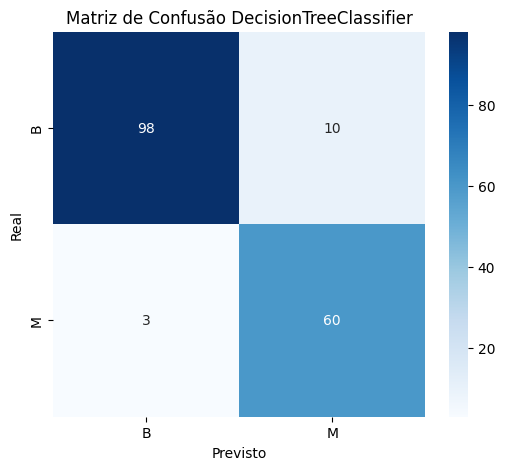

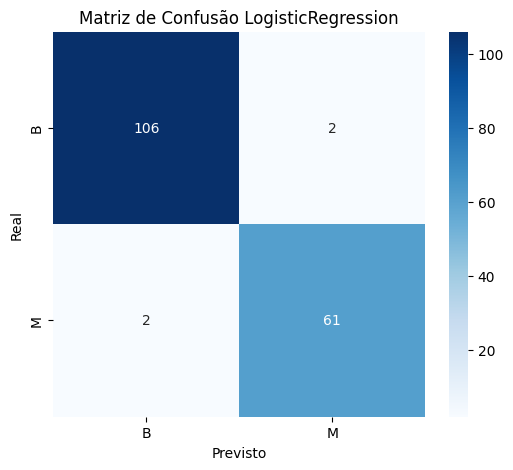

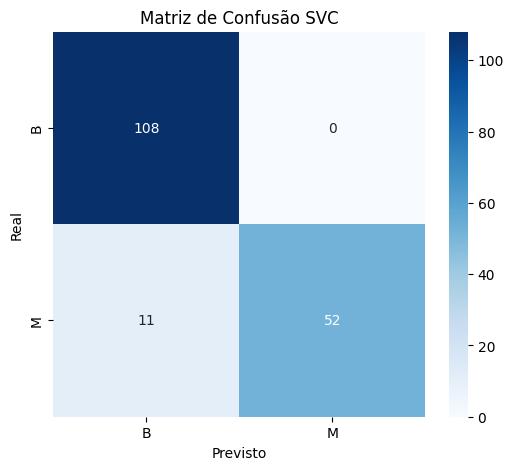

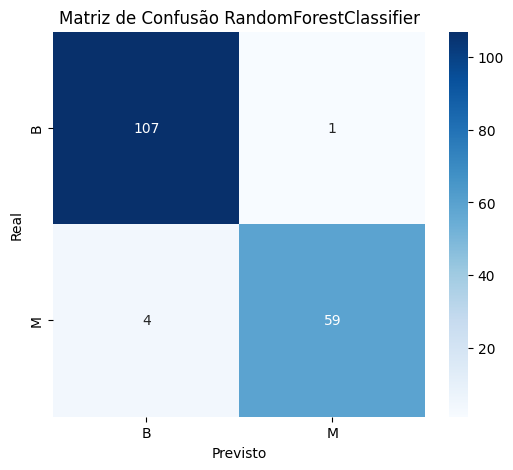

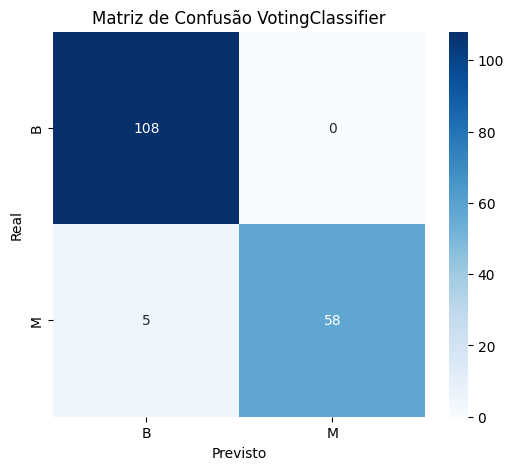

In [14]:
# classification_report and confusion matrix
for clf in (tree_clf, lr_clf, svm_clf, rf_clf, voting_clfs):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(f'{clf.__class__.__name__}\n',classification_report(y_test, predictions))
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, predictions),
        annot=True, fmt='d', cmap='Blues',
        xticklabels=['B', 'M'], yticklabels=['B', 'M'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão {clf.__class__.__name__}')